Análisis EDA Para Dataset de Muertes de Cáncer USA

In [574]:
#Instalar libreria
#pip install datadotworld en concola de sistema

In [575]:
##Creacion de EDA 

In [576]:
#Implementacion y analisis del data set

In [577]:
#Cargar Librerias
import pandas as pd
import numpy as np

#visualizacion
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Analisis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#datadotworld SDK
import datadotworld as ddw
%load_ext watermark

import time
%watermark -v -p pandas,numpy,matplotlib,datadotworld



The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.6.10
IPython 7.13.0

pandas 0.25.3
numpy 1.18.1
matplotlib 3.1.3
datadotworld 1.6.0


In [578]:
#Cargar datos de los data set en un Data Frame

#mortalidad = ddw.query('vkt0c09/cancerdatasettarea4', 'SELECT * FROM death').dataframe
#incidencia = ddw.query('vkt0c09/cancerdatasettarea4','SELECT * FROM incd')

#mortalidad.dataframe
#incidencia.dataframe

deaths = pd.read_csv('.\\death.csv')
incid = pd.read_csv('.\\incd.csv')

mortalidad = pd.DataFrame(deaths)
inicidencia = pd.DataFrame(incid)

#Mostrar datos de los data frame
mortalidad.head()

County   FIPS Met Objective of 45.5? (1)  \
0                United States      0                         No   
1       Perry County, Kentucky  21193                         No   
2      Powell County, Kentucky  21197                         No   
3  North Slope Borough, Alaska   2185                         No   
4      Owsley County, Kentucky  21189                         No   

  Age-Adjusted Death Rate Lower 95% Confidence Interval for Death Rate  \
0                      46                                         45.9   
1                   125.6                                        108.9   
2                   125.3                                        100.2   
3                   124.9                                           73   
4                   118.5                                         83.1   

  Upper 95% Confidence Interval for Death Rate Average Deaths per Year  \
0                                         46.1                 157,376   
1                                        144.2                      43   
2                                        155.1                      18   
3                                        194.7                       5   
4                                        165.5                       8   

  Recent Trend (2) Recent 5-Year Trend (2) in Death Rates  \
0          falling                                   -2.4   
1           stable                                   -0.6   
2           stable                                    1.7   
3               **                                     **   
4           stable                                    2.2   

  Lower 95% Confidence Interval for Trend  \
0                                    -2.6   
1                                    -2.7   
2                                       0   
3                                      **   
4                                    -0.4   

  Upper 95% Confidence Interval for Trend  
0                                    -2.2  
1                                     1.6  
2                                     3.4  
3                                      **  
4                                     4.8

In [579]:
inicidencia.head()

County  FIPS  \
0           US (SEER+NPCR)(1,10)     0   
1  Autauga County, Alabama(6,10)  1001   
2  Baldwin County, Alabama(6,10)  1003   
3  Barbour County, Alabama(6,10)  1005   
4     Bibb County, Alabama(6,10)  1007   

  Age_Adjusted_Incidence Rate_cases per 100000 Lower 95%ConfidenceInterval  \
0                                         62.4                        62.3   
1                                         74.9                        65.1   
2                                         66.9                        62.4   
3                                         74.6                        61.8   
4                                         86.4                          71   

  Upper 95% Confidence Interval Average Annual Count Recent Trend  \
0                          62.6               214614      falling   
1                          85.7                   43       stable   
2                          71.7                  170       stable   
3                          89.4                   25       stable   
4                         104.2                   23       stable   

  Recent 5-Year Trend in Incidence Rates Lower 95% Confidence Interval  \
0                                   -2.5                            -3   
1                                    0.5                         -14.9   
2                                      3                         -10.2   
3                                   -6.4                         -18.3   
4                                   -4.5                         -31.4   

  Upper 95% Confidence Interval.1  
0                              -2  
1                            18.6  
2                            18.3  
3                             7.3  
4                            32.9

In [580]:
#Mostrar informacion de los dataframe 
mortalidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 11 columns):
County                                          3141 non-null object
FIPS                                            3141 non-null int64
Met Objective of 45.5? (1)                      3141 non-null object
Age-Adjusted Death Rate                         3141 non-null object
Lower 95% Confidence Interval for Death Rate    3141 non-null object
Upper 95% Confidence Interval for Death Rate    3141 non-null object
Average Deaths per Year                         3141 non-null object
Recent Trend (2)                                3141 non-null object
Recent 5-Year Trend (2) in Death Rates          3141 non-null object
Lower 95% Confidence Interval for Trend         3141 non-null object
Upper 95% Confidence Interval for Trend         3141 non-null object
dtypes: int64(1), object(10)
memory usage: 270.1+ KB


In [581]:
inicidencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 10 columns):
County                                          3141 non-null object
FIPS                                            3141 non-null int64
Age_Adjusted_Incidence Rate_cases per 100000    3141 non-null object
Lower 95%ConfidenceInterval                     3141 non-null object
Upper 95% Confidence Interval                   3141 non-null object
Average Annual Count                            3141 non-null object
Recent Trend                                    3141 non-null object
Recent 5-Year Trend in Incidence Rates          3141 non-null object
Lower 95% Confidence Interval                   3141 non-null object
Upper 95% Confidence Interval.1                 3141 non-null object
dtypes: int64(1), object(9)
memory usage: 245.5+ KB


In [582]:
#Limpieza de datos
mortalidad = mortalidad[mortalidad.FIPS.notnull()]
inicidencia = inicidencia[inicidencia.FIPS.notnull()]

#Estandarizacion de puntuacion 
mortalidad['FIPS'] = mortalidad.FIPS.apply(lambda x: str(int(x)))\
                            .astype(np.object_)\
                            .str.pad(5, 'left', '0')

inicidencia['FIPS'] = inicidencia.FIPS.apply(lambda x: str(int(x)))\
                            .astype(np.object_)\
                            .str.pad(5, 'left', '0')

In [583]:
#Eliminacion de datos innecesarios (Eliminar bulla de datos)

In [584]:
inicidencia.drop(inicidencia.columns[[0,3,4,7,8,9]].values, axis=1, inplace=True)
inicidencia.head()

FIPS Age_Adjusted_Incidence Rate_cases per 100000 Average Annual Count  \
0  00000                                         62.4               214614   
1  01001                                         74.9                   43   
2  01003                                         66.9                  170   
3  01005                                         74.6                   25   
4  01007                                         86.4                   23   

  Recent Trend  
0      falling  
1       stable  
2       stable  
3       stable  
4       stable

In [585]:
mortalidad.drop(mortalidad.columns[[0,2,4,5,7,8,9,10]], axis=1, inplace=True)
mortalidad.head()

FIPS Age-Adjusted Death Rate Average Deaths per Year
0  00000                      46                 157,376
1  21193                   125.6                      43
2  21197                   125.3                      18
3  02185                   124.9                       5
4  21189                   118.5                       8

In [586]:
#Modificacion de Encabezados de columnas
inicidencia.rename(columns={inicidencia.columns[1]:'Velocidad_Incidencia',
                       inicidencia.columns[2]:'Promedio_Ann_Incidencia'}, inplace=True)

mortalidad.rename(columns={mortalidad.columns[1]:'Velocidad_Mortalidad',
                       mortalidad.columns[2]:'Promedio_Ann_Muertes'}, inplace=True)

In [587]:
inicidencia.head()

FIPS Velocidad_Incidencia Promedio_Ann_Incidencia Recent Trend
0  00000                 62.4                  214614      falling
1  01001                 74.9                      43       stable
2  01003                 66.9                     170       stable
3  01005                 74.6                      25       stable
4  01007                 86.4                      23       stable

In [588]:
mortalidad.head()

FIPS Velocidad_Mortalidad Promedio_Ann_Muertes
0  00000                   46              157,376
1  21193                125.6                   43
2  21197                125.3                   18
3  02185                124.9                    5
4  21189                118.5                    8

In [589]:
# Cargar Dataset Socioeconómicos USA y Censo de USA para 
# obtener el Indice de Pobreza

In [590]:
estodosFinancieros = ddw.load_dataset('uscensusbureau/acs-2015-5-e-poverty')

In [591]:
#Cargar de tablas de Datset Socioeconomico
tablasSocioEconomicas = []
for x in estodosFinancieros.tables:
    if len(x) == 2:
        tablasSocioEconomicas.append(x)

In [592]:
tablasSocioEconomicas.remove('pr')

In [593]:
#Recuperacion de datos socioeconomicos Censo USA 
#Analisis de de estado socioeconocmico en base al genero de sexo (H-> Hombre, M-> Mujer)
inicio = time.time()
columnas = '`State`, `StateFIPS`, `CountyFIPS`, `AreaName`, `B17001_002`, `B17001_003`,'\
       '`B17001_017`'

for x, estado in enumerate(tablasSocioEconomicas):
    if x == 0:
        estadoSocioE_Total = ddw.query('uscensusbureau/acs-2015-5-e-poverty',
                  '''SELECT %s FROM `AK`
                     WHERE SummaryLevel=50''' % columnas).dataframe 
    else:
        censo = ddw.query('uscensusbureau/acs-2015-5-e-poverty',
                       '''SELECT %s FROM `%s`
                          WHERE SummaryLevel=50''' % (columnas, estado.upper())).dataframe
        estadoSocioE_Total= pd.concat([estadoSocioE_Total, censo], ignore_index=True)
fin = time.time()

estadoSocioE_Total['StateFIPS'] = estadoSocioE_Total.StateFIPS.astype(np.object_)\
                                    .apply(lambda x: str(x))\
                                    .str.pad(2, 'left', '0')
estadoSocioE_Total['CountyFIPS'] = estadoSocioE_Total.CountyFIPS.astype(np.object_)\
                                      .apply(lambda x: str(x))\
                                      .str.pad(3, 'left', '0')

estadoSocioE_Total.head()

State StateFIPS CountyFIPS                            AreaName  B17001_002  \
0    AK        02        013      Aleutians East Borough, Alaska         553   
1    AK        02        016  Aleutians West Census Area, Alaska         499   
2    AK        02        020      Anchorage Municipality, Alaska       23914   
3    AK        02        050          Bethel Census Area, Alaska        4364   
4    AK        02        060         Bristol Bay Borough, Alaska          69   

   B17001_003  B17001_017  
0         334         219  
1         273         226  
2       10698       13216  
3        2199        2165  
4          33          36

In [594]:
#Modificacion de los valores calculados

In [595]:
estadoSocioE_Total.rename(columns={'B17001_002':'Pobreza_Total', 'B17001_003':'Hombres', 'B17001_017':'Mujeres', 'AreaName':'Zona'},inplace=True)

In [596]:
estadoSocioE_Total.head()

State StateFIPS CountyFIPS                                Zona  \
0    AK        02        013      Aleutians East Borough, Alaska   
1    AK        02        016  Aleutians West Census Area, Alaska   
2    AK        02        020      Anchorage Municipality, Alaska   
3    AK        02        050          Bethel Census Area, Alaska   
4    AK        02        060         Bristol Bay Borough, Alaska   

   Pobreza_Total  Hombres  Mujeres  
0            553      334      219  
1            499      273      226  
2          23914    10698    13216  
3           4364     2199     2165  
4             69       33       36

Analisis de Datos de ingresos de capital de Hogares(Diferentes Etnias)

In [597]:
columnas = '`StateFIPS`, `CountyFIPS`,'\
       '`B19013_001`, `B19013A_001`, `B19013B_001`, `B19013C_001`, `B19013D_001`,'\
       '`B19013I_001`'
incio = time.time()

for i, estado in enumerate(tablasSocioEconomicas):
    if i == 0:
        ingresos = ddw.query('uscensusbureau/acs-2015-5-e-income',
                  '''SELECT %s FROM `AK`
                     WHERE SummaryLevel=50''' % columnas).dataframe 
    else:
        totales = ddw.query('uscensusbureau/acs-2015-5-e-income',
                       '''SELECT %s FROM `%s`
                          WHERE SummaryLevel=50''' % (columnas, estado.upper())).dataframe
        ingresos = pd.concat([ingresos, totales], ignore_index=True)
fin = time.time()

ingresos['StateFIPS'] = ingresos.StateFIPS.astype(np.object_)\
                                .apply(lambda x: str(x))\
                                .str.pad(2, 'left', '0')
ingresos['CountyFIPS'] = ingresos.CountyFIPS.astype(np.object_)\
                                 .apply(lambda x: str(x))\
                                 .str.pad(3, 'left', '0')

ingresos.head()

StateFIPS CountyFIPS  B19013_001  B19013A_001  B19013B_001 B19013C_001  \
0        02        013     61518.0      72639.0      31250.0       54750   
1        02        016     84306.0      97321.0      93750.0       48750   
2        02        020     78326.0      87235.0      50535.0       53935   
3        02        050     51012.0      92647.0      73661.0       41594   
4        02        060     79750.0      88000.0          NaN       63333   

  B19013D_001  B19013I_001  
0       62679      51250.0  
1       81250      77500.0  
2       63757      53926.0  
3      110625     160114.0  
4         NaN      25625.0

In [598]:
#Modificacion de columnas columnas calculadas
ingresos.rename(columns={'B19013_001':'Ingresos_Medios', 'B19013A_001':'Ingresos_Medios_Blancos', 
                         'B19013B_001':'Ingresos_Afroamericanos', 'B19013C_001':'Ingresos_Medios_Nat_Americano',
                         'B19013D_001':'Ingresos_Medios_Asiaticos', 'B19013I_001':'Ingresos_Medios_Hispanos'}, inplace=True)
ingresos.head()

StateFIPS CountyFIPS  Ingresos_Medios  Ingresos_Medios_Blancos  \
0        02        013          61518.0                  72639.0   
1        02        016          84306.0                  97321.0   
2        02        020          78326.0                  87235.0   
3        02        050          51012.0                  92647.0   
4        02        060          79750.0                  88000.0   

   Ingresos_Afroamericanos Ingresos_Medios_Nat_Americano  \
0                  31250.0                         54750   
1                  93750.0                         48750   
2                  50535.0                         53935   
3                  73661.0                         41594   
4                      NaN                         63333   

  Ingresos_Medios_Asiaticos  Ingresos_Medios_Hispanos  
0                     62679                   51250.0  
1                     81250                   77500.0  
2                     63757                   53926.0  
3                    110625                  160114.0  
4                       NaN                   25625.0

Analisis de Cobertura de Seguro Medico Por Edad y por Sexo

In [599]:
columnas = '`StateFIPS`, `CountyFIPS`,'\
       '`B27001_004`, `B27001_005`, `B27001_007`, `B27001_008`,'\
       '`B27001_010`, `B27001_011`, `B27001_013`, `B27001_014`,'\
       '`B27001_016`, `B27001_017`, `B27001_019`, `B27001_020`,'\
       '`B27001_022`, `B27001_023`, `B27001_025`, `B27001_026`,'\
       '`B27001_028`, `B27001_029`, `B27001_032`, `B27001_033`,'\
       '`B27001_035`, `B27001_036`, `B27001_038`, `B27001_039`,'\
       '`B27001_041`, `B27001_042`, `B27001_044`, `B27001_045`,'\
       '`B27001_047`, `B27001_048`, `B27001_050`, `B27001_051`,'\
       '`B27001_053`, `B27001_054`, `B27001_056`, `B27001_057`'
inicio = time.time()

for i, estado in enumerate(tablasSocioEconomicas):
    if i == 0:
        cobertura = ddw.query('uscensusbureau/acs-2015-5-e-healthinsurance',
                  '''SELECT %s FROM `AK`
                     WHERE SummaryLevel=50''' % columnas).dataframe 
   
    else:
        total = ddw.query('uscensusbureau/acs-2015-5-e-healthinsurance',
                       '''SELECT %s FROM `%s`
                          WHERE SummaryLevel=50''' % (columnas, estado.upper())).dataframe
        cobertura = pd.concat([cobertura, total], ignore_index=True)

end = time.time()

cobertura['StateFIPS'] = cobertura.StateFIPS.astype(np.object_)\
                                      .apply(lambda x: str(x))\
                                      .str.pad(2, 'left', '0')
cobertura['CountyFIPS'] = cobertura.CountyFIPS.astype(np.object_)\
                                        .apply(lambda x: str(x))\
                                        .str.pad(3, 'left', '0')
cobertura.head()

StateFIPS CountyFIPS  B27001_004  B27001_005  B27001_007  B27001_008  \
0        02        013          57          20          91          62   
1        02        016         111          28         279          61   
2        02        020       12404        1513       21747        2957   
3        02        050        1002         145        1951         204   
4        02        060          32           4          71          16   

   B27001_010  B27001_011  B27001_013  B27001_014  ...  B27001_044  \
0          51         212          90         246  ...          68   
1         260         102         335         219  ...         231   
2       12011        3967       17188        5650  ...       15569   
3         460         511         666         597  ...         736   
4          39          13          36          30  ...          53   

   B27001_045  B27001_047  B27001_048  B27001_050  B27001_051  B27001_053  \
0          55         168         134          59         117          48   
1          99         266          76         169         116          72   
2        3050       16525        3482       15011        2310        8106   
3         224         625         281         501         251         372   
4           9          63          13          49          14          13   

   B27001_054  B27001_056  B27001_057  
0           9          25           0  
1          12          17           0  
2         252        4829          29  
3           6         197           0  
4           0          16           0  

[5 rows x 38 columns]

In [600]:
#Columnas que representan Hombres en estadidistica de seguros
Hombres = ['`B27001_004`', '`B27001_005`', '`B27001_007`', '`B27001_008`',
           '`B27001_010`', '`B27001_011`', '`B27001_013`', '`B27001_014`',
           '`B27001_016`', '`B27001_017`', '`B27001_019`', '`B27001_020`',
           '`B27001_022`', '`B27001_023`', '`B27001_025`', '`B27001_026`',
           '`B27001_028`', '`B27001_029`']

#Columnas que representan Mujeres en estadidistica de seguros
Mujeres = ['`B27001_032`', '`B27001_033`', '`B27001_035`', '`B27001_036`', 
           '`B27001_038`', '`B27001_039`', '`B27001_041`', '`B27001_042`', 
           '`B27001_044`', '`B27001_045`', '`B27001_047`', '`B27001_048`', 
           '`B27001_050`', '`B27001_051`', '`B27001_053`', '`B27001_054`', 
           '`B27001_056`', '`B27001_057`']

In [601]:
#Analisis de Data de seguros
#Division de Con y Sin seguro medico

Homnbres_Con = []
Hombres_Sin = []
Mujeres_Con = []
Mujeres_Sin = []

for i, j in enumerate(Hombres):
    if i % 2 == 0:
        Homnbres_Con.append(j.replace('`', ''))
    else:
        Hombres_Sin.append(j.replace('`', ''))
        
for i, j in enumerate(Mujeres):
    if i % 2 == 0:
        Mujeres_Con.append(j.replace('`', ''))
    else:
        Mujeres_Sin.append(j.replace('`', ''))

In [602]:
#Suma de resultados
Lista_Total = [Homnbres_Con, Hombres_Sin, Mujeres_Con, Mujeres_Sin]
columnasEditadas = ['H_Con', 'H_Sin', 'M_Con', 'M_Sin'] 

for col in columnasEditadas:
    cobertura[col] = 0

for i in Homnbres_Con:
    cobertura['H_Con'] += cobertura[i]  
for i in Hombres_Sin:
    cobertura['H_Sin'] += cobertura[i]
for i in Mujeres_Con:
    cobertura['M_Con'] += cobertura[i]
for i in Mujeres_Sin:
    cobertura['M_Sin'] += cobertura[i]
    
cobertura['Total_Con'] = cobertura.H_Con + cobertura.M_Con
cobertura['Total_Sin'] = cobertura.H_Sin + cobertura.M_Sin

cobertura.head()


StateFIPS CountyFIPS  B27001_004  B27001_005  B27001_007  B27001_008  \
0        02        013          57          20          91          62   
1        02        016         111          28         279          61   
2        02        020       12404        1513       21747        2957   
3        02        050        1002         145        1951         204   
4        02        060          32           4          71          16   

   B27001_010  B27001_011  B27001_013  B27001_014  ...  B27001_053  \
0          51         212          90         246  ...          48   
1         260         102         335         219  ...          72   
2       12011        3967       17188        5650  ...        8106   
3         460         511         666         597  ...         372   
4          39          13          36          30  ...          13   

   B27001_054  B27001_056  B27001_057   H_Con  H_Sin   M_Con  M_Sin  \
0           9          25           0     876   1317     566    540   
1          12          17           0    2470    769    1707    564   
2         252        4829          29  120747  23245  122426  21393   
3           6         197           0    6396   2708    6627   1774   
4           0          16           0     419    124     349     67   

   Total_Con  Total_Sin  
0       1442       1857  
1       4177       1333  
2     243173      44638  
3      13023       4482  
4        768        191  

[5 rows x 44 columns]

In [603]:
#Eliminacion de Variables individuales de Edad No Agrupables, y asigandas a cobertura en campo Plus
cobertura_extra = total.loc[:, total.columns[total.columns.str.contains('B27001')].values]
cobertura.drop(total.columns[total.columns.str.contains('B27001')].values, axis=1, inplace=True)

cobertura.head()

StateFIPS CountyFIPS   H_Con  H_Sin   M_Con  M_Sin  Total_Con  Total_Sin
0        02        013     876   1317     566    540       1442       1857
1        02        016    2470    769    1707    564       4177       1333
2        02        020  120747  23245  122426  21393     243173      44638
3        02        050    6396   2708    6627   1774      13023       4482
4        02        060     419    124     349     67        768        191

#Union de Codigos FIPS, para intersecion de datos

In [604]:
UnionCodigos = [estadoSocioE_Total, ingresos, cobertura, inicidencia, mortalidad]

#Caracteristicas De FIPS
for df in [estadoSocioE_Total, ingresos, cobertura]:
    df['FIPS'] = df.StateFIPS + df.CountyFIPS
    df.drop(['StateFIPS', 'CountyFIPS'], axis=1, inplace=True)
    
#Observar intersecion de FIPS en caracteristicas a traves de los DatFrame
[[i, ii, sum(pd.Series(j.FIPS.unique()).isin(UnionCodigos[ii].FIPS))] 
    for i, j in enumerate(UnionCodigos) for ii in range(len(UnionCodigos))]

[[0, 0, 3142],
 [0, 1, 3142],
 [0, 2, 3142],
 [0, 3, 3134],
 [0, 4, 3134],
 [1, 0, 3142],
 [1, 1, 3142],
 [1, 2, 3142],
 [1, 3, 3134],
 [1, 4, 3134],
 [2, 0, 3142],
 [2, 1, 3142],
 [2, 2, 3142],
 [2, 3, 3134],
 [2, 4, 3134],
 [3, 0, 3134],
 [3, 1, 3134],
 [3, 2, 3134],
 [3, 3, 3141],
 [3, 4, 3141],
 [4, 0, 3134],
 [4, 1, 3134],
 [4, 2, 3134],
 [4, 3, 3141],
 [4, 4, 3141]]

In [605]:
for i in UnionCodigos:
    print(len(i.FIPS.unique()))

3142
3142
3142
3141
3141


In [606]:
#Inicio de EDA - CONTINUACION DE LIMPIEZA DE DATOS

In [607]:
#Creacion de Dataset con valores FIPS
#Total_Datasets = [estadoSocioE_Total, ingresos, cobertura, inicidencia, mortalidad]
for i, j in enumerate(UnionCodigos):
    if i == 0:
        FIPS_Totales = j.copy()
    else:
        FIPS_Totales = FIPS_Totales.merge(j, how='inner', on='FIPS')   

FIPS_Totales.shape
FIPS_Totales.head()


State                                Zona  Pobreza_Total  Hombres  Mujeres  \
0    AK      Aleutians East Borough, Alaska            553      334      219   
1    AK  Aleutians West Census Area, Alaska            499      273      226   
2    AK      Anchorage Municipality, Alaska          23914    10698    13216   
3    AK          Bethel Census Area, Alaska           4364     2199     2165   
4    AK         Bristol Bay Borough, Alaska             69       33       36   

    FIPS  Ingresos_Medios  Ingresos_Medios_Blancos  Ingresos_Afroamericanos  \
0  02013          61518.0                  72639.0                  31250.0   
1  02016          84306.0                  97321.0                  93750.0   
2  02020          78326.0                  87235.0                  50535.0   
3  02050          51012.0                  92647.0                  73661.0   
4  02060          79750.0                  88000.0                      NaN   

  Ingresos_Medios_Nat_Americano  ...  H_Sin   M_Con  M_Sin  Total_Con  \
0                         54750  ...   1317     566    540       1442   
1                         48750  ...    769    1707    564       4177   
2                         53935  ...  23245  122426  21393     243173   
3                         41594  ...   2708    6627   1774      13023   
4                         63333  ...    124     349     67        768   

   Total_Sin  Velocidad_Incidencia  Promedio_Ann_Incidencia  Recent Trend  \
0       1857                    *                3 or fewer             *   
1       1333                    *                3 or fewer             *   
2      44638                  61.5                      131        stable   
3       4482                  62.7                        6        stable   
4        191                    *                3 or fewer             *   

  Velocidad_Mortalidad Promedio_Ann_Muertes  
0                    *                    *  
1                    *                    *  
2                 47.3                   96  
3                 58.3                    5  
4                    *                    *  

[5 rows x 23 columns]

In [608]:
#Eliminacion de Medias Etnicas debido a que aun estan incompletas
FIPS_Totales.drop(['Ingresos_Medios_Blancos', 'Ingresos_Afroamericanos', 'Ingresos_Medios_Nat_Americano',
             'Ingresos_Medios_Asiaticos', 'Ingresos_Medios_Hispanos'], axis=1, inplace=True)


In [609]:
#Formateo de valores numericos a objetos numericos

def get_types(col_name):
    ts = (pd.Series([type(i) for i in FIPS_Totales[col_name]]).value_counts())
    print("%s\n" % feature, ts, "\n", "-"*30)

for feature in FIPS_Totales.columns:
    get_types(feature)

State
 <class 'str'>    3134
dtype: int64 
 ------------------------------
Zona
 <class 'str'>    3134
dtype: int64 
 ------------------------------
Pobreza_Total
 <class 'int'>    3134
dtype: int64 
 ------------------------------
Hombres
 <class 'int'>    3134
dtype: int64 
 ------------------------------
Mujeres
 <class 'int'>    3134
dtype: int64 
 ------------------------------
FIPS
 <class 'str'>    3134
dtype: int64 
 ------------------------------
Ingresos_Medios
 <class 'float'>    3134
dtype: int64 
 ------------------------------
H_Con
 <class 'int'>    3134
dtype: int64 
 ------------------------------
H_Sin
 <class 'int'>    3134
dtype: int64 
 ------------------------------
M_Con
 <class 'int'>    3134
dtype: int64 
 ------------------------------
M_Sin
 <class 'int'>    3134
dtype: int64 
 ------------------------------
Total_Con
 <class 'int'>    3134
dtype: int64 
 ------------------------------
Total_Sin
 <class 'int'>    3134
dtype: int64 
 --------------------------

In [610]:
#Validacion de datos no lejibles para el calculo de la taza de mortalidad por Cancer
def f(column):
    types = []
    for _, j in enumerate(column):
        try:
            pd.to_numeric(j)
            
        except:
            types.append(j)
    print(pd.Series(types).value_counts())

f(FIPS_Totales.Velocidad_Mortalidad)


*    325
dtype: int64


In [611]:
#Analisis de datos No lejibles 
FIPS_Totales.loc[FIPS_Totales.Velocidad_Mortalidad == '*', 'State']

0       AK
1       AK
4       AK
5       AK
6       AK
        ..
2956    WA
2979    WA
3023    WI
3124    WY
3128    WY
Name: State, Length: 325, dtype: object

In [612]:
Casos = pd.to_numeric(FIPS_Totales.Velocidad_Mortalidad[FIPS_Totales.Velocidad_Mortalidad != '*'])
print("min", Casos.min(), "max", Casos.max())

plt.title('Estados con Valores No Legibles')
plt.hist(Casos, bins=20, alpha=1, edgecolor = 'black',  linewidth=1)
plt.show()
plt.clf()

min 9.2 max 125.6


<Figure size 432x288 with 0 Axes>

In [613]:
#Analisis de Dataset de Poblacion
poblacion = ddw.query('nrippner/us-population-estimates-2015',
                         '''SELECT `POPESTIMATE2015`, `STATE`, `COUNTY`
                            FROM `CO-EST2015-alldata`''').dataframe
poblacion.head()

POPESTIMATE2015  STATE  COUNTY
0          4858979      1       0
1            55347      1       1
2           203709      1       3
3            26489      1       5
4            22583      1       7

In [614]:
estado = poblacion.STATE.apply(lambda x: str(x))\
                          .str.pad(2, 'left', '0')

cantidad = poblacion.COUNTY.apply(lambda x: str(x))\
                            .str.pad(3, 'left', '0')

poblacion['FIPS'] = estado + cantidad
FIPS_Totales = FIPS_Totales.merge(poblacion[['FIPS', 'POPESTIMATE2015']], on='FIPS', how='inner')

In [615]:
#Estandarizacion de Valores FIPS
print(sum(pd.Series(FIPS_Totales.FIPS.unique()).isin(poblacion.FIPS)), 'Coincidencias de ')
print("%d Valores Unicos" % len(FIPS_Totales.FIPS.unique()))

FIPS_Totales = FIPS_Totales.merge(poblacion[['FIPS', 'POPESTIMATE2015']], on='FIPS', how='inner')

3134 Coincidencias de 
3134 Valores Unicos


In [616]:
FIPS_Totales = FIPS_Totales[FIPS_Totales.Velocidad_Mortalidad != '*']

#Limpieza de datos 

FIPS_Totales['Ingresos_Medios'] = pd.to_numeric(FIPS_Totales.Ingresos_Medios)
FIPS_Totales.head()

State                                  Zona  Pobreza_Total  Hombres  \
2     AK        Anchorage Municipality, Alaska          23914    10698   
3     AK            Bethel Census Area, Alaska           4364     2199   
7     AK  Fairbanks North Star Borough, Alaska           7752     3523   
9     AK       Juneau City and Borough, Alaska           2110     1145   
10    AK       Kenai Peninsula Borough, Alaska           5558     2596   

    Mujeres   FIPS  Ingresos_Medios   H_Con  H_Sin   M_Con  M_Sin  Total_Con  \
2     13216  02020          78326.0  120747  23245  122426  21393     243173   
3      2165  02050          51012.0    6396   2708    6627   1774      13023   
7      4229  02090          71068.0   40605   6957   40210   5322      80815   
9       965  02110          85746.0   13739   2433   13582   2213      27321   
10     2962  02122          63684.0   22391   6435   21668   5433      44059   

    Total_Sin Velocidad_Incidencia Promedio_Ann_Incidencia Recent Trend  \
2       44638                 61.5                     131       stable   
3        4482                 62.7                       6       stable   
7       12279                 58.1                      36       stable   
9        4646                 35.1                       9       stable   
10      11868                 64.9                      39       stable   

   Velocidad_Mortalidad Promedio_Ann_Muertes  POPESTIMATE2015_x  \
2                  47.3                   96             298695   
3                  58.3                    5              17946   
7                    54                   31              99631   
9                  34.4                    8              32756   
10                 50.1                   28              58059   

    POPESTIMATE2015_y  
2              298695  
3               17946  
7               99631  
9               32756  
10              58059

#Preparacion de Modelo de datos

In [617]:
#Ajuste de DataSet
FIPS_Totales.rename(columns={'Recent Trend':'TendenciaReciente'}, inplace=True)

#Remplazo de datos faltantes por "estable"
FIPS_Totales.replace({'TendenciaReciente' : {'*':'estable'}}, inplace=True)

#Creacion de funcion para el calculo de la alza
def f(x, term):
    if x == term:
        return 1
    else:
        return 0

FIPS_Totales['Aumento'] = FIPS_Totales.TendenciaReciente.apply(lambda x: f(x, term='aumento'))
FIPS_Totales['Rebaja'] = FIPS_Totales.TendenciaReciente.apply(lambda x: f(x, term='rebaja'))

In [618]:
#Verificacion de valores
FIPS_Totales['TendenciaReciente'].value_counts()

stable     2382
falling     197
_           151
rising       39
estable      28
__           12
Name: TendenciaReciente, dtype: int64

In [619]:
tazaMortalida = pd.to_numeric(FIPS_Totales.Velocidad_Mortalidad).values
DataSetMortalidad = FIPS_Totales.loc[:,['Pobreza_Total', 'Hombres', 'Mujeres', 'Ingresos_Medios',
            'H_Con', 'H_Sin', 'M_Con', 'M_Sin', 'Total_Con',
            'Total_Sin', 'Velocidad_Incidencia', 'Aumento', 'Rebaja',
            'POPESTIMATE2015_x']]
DataSetMortalidad.head()

Pobreza_Total  Hombres  Mujeres  Ingresos_Medios   H_Con  H_Sin   M_Con  \
2           23914    10698    13216          78326.0  120747  23245  122426   
3            4364     2199     2165          51012.0    6396   2708    6627   
7            7752     3523     4229          71068.0   40605   6957   40210   
9            2110     1145      965          85746.0   13739   2433   13582   
10           5558     2596     2962          63684.0   22391   6435   21668   

    M_Sin  Total_Con  Total_Sin Velocidad_Incidencia  Aumento  Rebaja  \
2   21393     243173      44638                 61.5        0       0   
3    1774      13023       4482                 62.7        0       0   
7    5322      80815      12279                 58.1        0       0   
9    2213      27321       4646                 35.1        0       0   
10   5433      44059      11868                 64.9        0       0   

    POPESTIMATE2015_x  
2              298695  
3               17946  
7               99631  
9               32756  
10              58059

In [620]:
#Validacion de errores
DataSetMortalidad['Velocidad_Incidencia'] = pd.to_numeric(DataSetMortalidad.Velocidad_Incidencia, errors='coerce')

DataSetMortalidad['Velocidad_Incidencia'] = DataSetMortalidad.Velocidad_Incidencia.fillna(DataSetMortalidad.Velocidad_Incidencia.median())

#Verificacion de Datos Nulos
print(sum(DataSetMortalidad.Velocidad_Incidencia.isnull()))

0


In [621]:
for col in ['Pobreza_Total', 'Hombres','Mujeres', 'H_Con', 'H_Sin',
            'M_Sin', 'M_Con', 'Total_Con', 'Total_Sin']:
       
    DataSetMortalidad[col + "_PC"] = DataSetMortalidad[col] / DataSetMortalidad.POPESTIMATE2015_x * 10**5

DataSetMortalidad.head()

Pobreza_Total  Hombres  Mujeres  Ingresos_Medios   H_Con  H_Sin   M_Con  \
2           23914    10698    13216          78326.0  120747  23245  122426   
3            4364     2199     2165          51012.0    6396   2708    6627   
7            7752     3523     4229          71068.0   40605   6957   40210   
9            2110     1145      965          85746.0   13739   2433   13582   
10           5558     2596     2962          63684.0   22391   6435   21668   

    M_Sin  Total_Con  Total_Sin  ...  POPESTIMATE2015_x  Pobreza_Total_PC  \
2   21393     243173      44638  ...             298695       8006.160130   
3    1774      13023       4482  ...              17946      24317.396634   
7    5322      80815      12279  ...              99631       7780.710823   
9    2213      27321       4646  ...              32756       6441.567957   
10   5433      44059      11868  ...              58059       9573.020548   

      Hombres_PC    Mujeres_PC      H_Con_PC      H_Sin_PC     M_Sin_PC  \
2    3581.579872   4424.580257  40424.848089   7782.185842  7162.155376   
3   12253.426948  12063.969687  35640.254096  15089.713585  9885.211189   
7    3536.048017   4244.662806  40755.387379   6982.766408  5341.710913   
9    3495.542801   2946.025156  41943.460740   7427.646843  6756.014165   
10   4471.313664   5101.706884  38565.941542  11083.552938  9357.722317   

        M_Con_PC  Total_Con_PC  Total_Sin_PC  
2   40986.959942  81411.808032  14944.341218  
3   36927.449014  72567.703109  24974.924774  
7   40358.924431  81114.311811  12324.477321  
9   41464.159238  83407.619978  14183.661009  
10  37320.656573  75886.598116  20441.275254  

[5 rows x 23 columns]

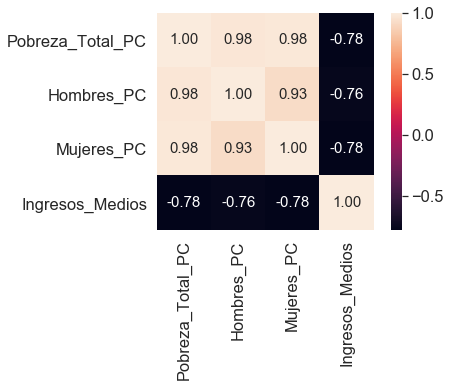

In [622]:
#Validacion Cruzada

cols = ['Pobreza_Total_PC', 'Hombres_PC', 'Mujeres_PC', 'Ingresos_Medios']
cm = np.corrcoef(DataSetMortalidad[['Pobreza_Total_PC', 'Hombres_PC', 'Mujeres_PC', 'Ingresos_Medios']].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15},
                 yticklabels=cols, xticklabels=cols)
plt.show()

In [623]:
#Eliminacion de datos sobre indices de pobreza relacionadas al genero
#DataSetMortalidad.drop(['Hombres_PC', 'Mujeres_PC'], axis=1, inplace=True)
DataSetMortalidad.drop(['H_Con_PC', 'H_Sin_PC'], axis=1, inplace=True)
DataSetMortalidad.drop(['M_Con_PC', 'M_Sin_PC'], axis=1, inplace=True)
DataSetMortalidad.head()

Pobreza_Total  Hombres  Mujeres  Ingresos_Medios   H_Con  H_Sin   M_Con  \
2           23914    10698    13216          78326.0  120747  23245  122426   
3            4364     2199     2165          51012.0    6396   2708    6627   
7            7752     3523     4229          71068.0   40605   6957   40210   
9            2110     1145      965          85746.0   13739   2433   13582   
10           5558     2596     2962          63684.0   22391   6435   21668   

    M_Sin  Total_Con  Total_Sin  Velocidad_Incidencia  Aumento  Rebaja  \
2   21393     243173      44638                  61.5        0       0   
3    1774      13023       4482                  62.7        0       0   
7    5322      80815      12279                  58.1        0       0   
9    2213      27321       4646                  35.1        0       0   
10   5433      44059      11868                  64.9        0       0   

    POPESTIMATE2015_x  Pobreza_Total_PC    Hombres_PC    Mujeres_PC  \
2              298695       8006.160130   3581.579872   4424.580257   
3               17946      24317.396634  12253.426948  12063.969687   
7               99631       7780.710823   3536.048017   4244.662806   
9               32756       6441.567957   3495.542801   2946.025156   
10              58059       9573.020548   4471.313664   5101.706884   

    Total_Con_PC  Total_Sin_PC  
2   81411.808032  14944.341218  
3   72567.703109  24974.924774  
7   81114.311811  12324.477321  
9   83407.619978  14183.661009  
10  75886.598116  20441.275254

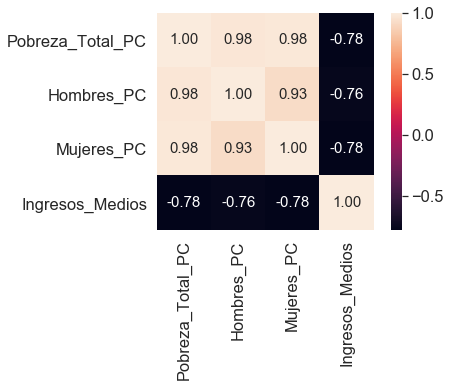

In [624]:
#Visualizacion de Correlacion
cm = np.corrcoef(DataSetMortalidad[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15},
                 yticklabels=cols, xticklabels=cols)
plt.show()

In [625]:
#Aplicar modelo de Regresion Linear
columnas = ['Pobreza_Total_PC', 'Ingresos_Medios', 'Total_Con_PC',  'Total_Sin_PC',
        'Velocidad_Incidencia', 'POPESTIMATE2015_x', 'Rebaja', 'Aumento', 'Pobreza_Total',
        'Total_Con', 'Total_Sin']

In [626]:
# AGREGAR CONSTANTE
DataSetMortalidad = DataSetMortalidad[cols]
DataSetMortalidad['Constante'] = 1
DataSetMortalidad.reset_index(drop=True, inplace=True)

In [627]:
# Ajustar Regresion Linear
lr = sm.OLS(tazaMortalida, DataSetMortalidad, hasconst=True)
result = lr.fit()

In [628]:
#Visualizacion Modelo
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     248.8
Date:                Mon, 30 Mar 2020   Prob (F-statistic):          3.64e-143
Time:                        19:25:34   Log-Likelihood:                -11075.
No. Observations:                2809   AIC:                         2.216e+04
Df Residuals:                    2805   BIC:                         2.218e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Pobreza_Total_PC     0.0001   4.26e-05      3.460      0.001    6.39e-05       0.000
Hombres_PC          -0.0007      0.000     -3.465      0.001      -0.001      -0.000
Mujeres_PC           0.0009      0.000      4.412      0.000       0.000       0.001
Ingresos_Medios     -0.0004   3.06e-05    -12.702      0.000      -0.000      -0.000
Constante           66.4125      2.322     28.605      0.000      61.860      70.965
==============================================================================
Omnibus:                      182.455   Durbin-Watson:                   1.311
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              487.425
Skew:                           0.354   Prob(JB):                    1.44e-106
Kurtosis:                       4.914   Cond. No.                     4.65e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.48e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""